In [1]:
import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [2]:
import CPTAC

Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Data...

 ******PLEASE READ******


In [3]:
somatic_mutations = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()

Test for protein levels (mutation in a gene with protein levels of any protein)

In [32]:
gene = 'CTNNB1'
protList = ['APC']

pcutoff = 0.05/len(protList)
print(pcutoff)

genedf = somatic_mutations[gene].to_frame()
for protein in protList:
    if protein in proteomics.columns:
        proteindf = proteomics[protein].to_frame()
        cross = genedf.add(proteindf, fill_value=0).dropna(axis=0)
        mutated = cross.loc[cross[gene] == 1.0]
        wt = cross.loc[cross[gene] == 0.0]
        ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
        print("Test for " + protein + ": ")
        print(ttest)

0.05
Test for APC: 
Ttest_indResult(statistic=2.3788061421962734, pvalue=0.019306819408921982)


Boxplot

[Text(0, 0.5, 'Proteomics'), Text(0.5, 0, 'Somatic Gene Mutation')]

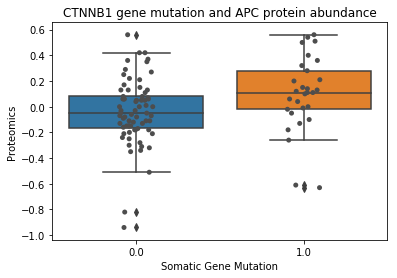

In [33]:
somatic_boxplot = sns.boxplot(data=cross, x=gene ,y=protList[0])
somatic_boxplot.set_title(gene + " gene mutation and " + protList[0] + " protein abundance")
somatic_boxplot = sns.stripplot(data=cross, x=gene, y=protList[0],jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")

Test for phosphorylation levels (mutation in a gene with phosphorylation of any protein)

In [21]:
gene = 'CTNNB1'
sites = phos.filter(regex='CTNNB1')
sigResults = [];

genedf = somatic_mutations[gene].to_frame()
cross = genedf.add(sites, fill_value=0)
mutated = cross.loc[cross[gene] == 1.0]
wt = cross.loc[cross[gene] == 0.0]

pcutoff = 0.05/len(cross.columns)
print(cross)
print(pcutoff)

for loc in cross.columns:
    if not loc == gene:
        mutsitedf = mutated[[gene, loc]].dropna()
        wtsitedf = wt[[gene, loc]].dropna()
        ttest = scipy.stats.ttest_ind(mutsitedf[loc], wtsitedf[loc])
    #if ttest[1] <= pcutoff:
        sigResults.append(loc)
        print('Results for ' + loc + ': ')
        print(ttest)

      CTNNB1  CTNNB1-S191  CTNNB1-S552
S001     0.0        -0.10        -0.04
S002     0.0         0.39         0.13
S003     0.0        -0.34         0.47
S004     0.0         1.08         0.47
S005     0.0         0.82        -0.08
S006     1.0         1.00         0.52
S007     1.0         0.57         1.19
S008     0.0         0.08        -0.59
S009     0.0         0.30         0.07
S010     1.0         0.03        -0.20
S011     1.0        -0.18         0.22
S012     0.0        -0.99        -0.71
S013     0.0         0.55        -0.54
S014     0.0        -0.17        -0.91
S015     0.0         0.25        -0.55
S016     0.0         0.48        -0.07
S017     1.0         0.55        -0.42
S018     1.0        -0.05         1.35
S019     0.0        -1.73         0.40
S020     1.0         0.62         0.70
S021     1.0         0.67        -0.11
S022     1.0         0.50         0.21
S023     1.0         0.38         0.08
S024     1.0         0.83         0.50
S025     1.0         0.19